In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
class_labels=['T-shirt/Top','Trousers','Pullover','Dress','Cost','Sandal','Shirts','Sneaker','Bag','Ankle Boot']

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
train_image=train_images/255.0
test_image=test_images/255.0

In [6]:
train_image,val_image,train_labels,val_labels=train_test_split(train_image,train_labels,test_size=0.2,random_state=42)

In [7]:
model=models.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),layers.MaxPool2D((2,2)),layers.Conv2D(64,(3,3),activation='relu'),layers.Flatten(),
                         layers.Dense(128,activation='relu'),
                         layers.Dense(10,activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(train_image, train_labels, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7448 - loss: 0.6949
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8760 - loss: 0.3370
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8972 - loss: 0.2790
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9104 - loss: 0.2411
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9173 - loss: 0.2197


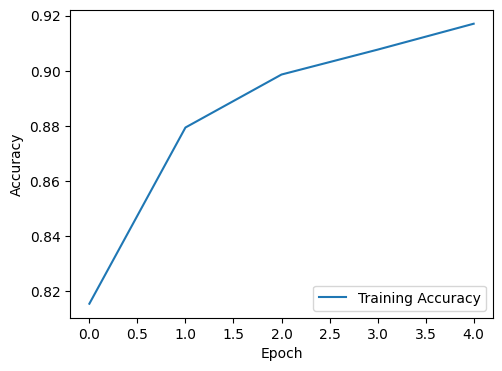

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

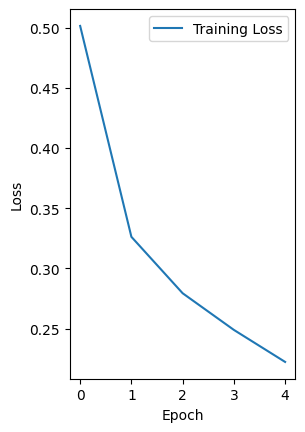

In [11]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score,ConfusionMatrixDisplay
predictions = model.predict(val_image)
predicted_labels = np.argmax(predictions, axis=1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


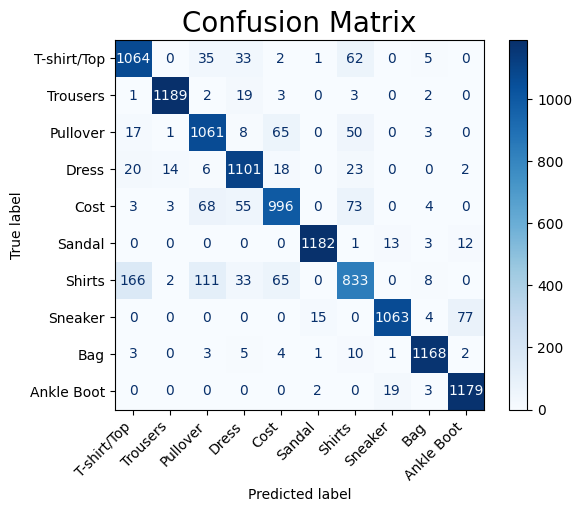

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(val_labels,predicted_labels)
disp=ConfusionMatrixDisplay(cm,display_labels=class_labels)
disp.plot(cmap='Blues',values_format='d',ax=plt.gca())
plt.title('Confusion Matrix',fontsize=20)
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [14]:
precision=precision_score(val_labels,predicted_labels,average='weighted')
recall=recall_score(val_labels,predicted_labels,average='weighted')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.90
Recall: 0.90


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


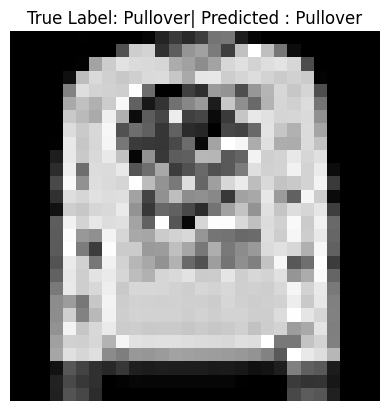

Predicted probabilities: [4.1715205e-03 1.3876909e-05 9.6409398e-01 8.7641216e-05 1.8675266e-03
 2.3352652e-06 2.8576400e-02 7.0932538e-07 1.1817830e-03 4.2231100e-06]


In [16]:
def predict_image(index):
    image = val_image[index].reshape(1, 28, 28)
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    plt.imshow(val_image[index], cmap='gray')
    plt.title(f'True Label: {class_labels[val_labels[index]]}| Predicted : {class_labels[predicted_label]}')
    plt.axis('off')
    plt.show()
    print(f'Predicted probabilities: {prediction[0]}')

predict_image(100)
